In [21]:
import datetime 
from datetime import timedelta
import pandas as pd
import backtrader.feeds as btfeeds
import pandas_datareader.data as web
import backtrader as bt 
import backtrader.indicators as btind
import backtrader.analyzers as btanalyzers
import matplotlib.pyplot as plt

In [22]:
class SMAC(bt.Strategy):
    
    params = {"fast": 20, "slow": 50,                  
              "optim": False, "optim_fs": (20, 50)}                                                      
                                                       
    def __init__(self):
 
        self.fastma = dict()
        self.slowma = dict()
        self.regime = dict()
 
        self._addobserver(True, bt.observers.BuySell)    
 
        if self.params.optim:    
            self.params.fast, self.params.slow = self.params.optim_fs    
 
        if self.params.fast > self.params.slow:
            raise ValueError(
                "A SMAC strategy cannot have the fast moving average's window greater than the slow moving average window.")
 
        for d in self.getdatanames():
 
            self.fastma[d] = btind.SimpleMovingAverage(self.getdatabyname(d),      
                                                       period=self.params.fast,    
                                                       plotname="FastMA: " + d)
            self.slowma[d] = btind.SimpleMovingAverage(self.getdatabyname(d),      
                                                       period=self.params.slow,    
                                                       plotname="SlowMA: " + d)
 
            self.regime[d] = self.fastma[d] - self.slowma[d]    
    
   
    def next(self):
        
        for d in self.getdatanames():    
            pos = self.getpositionbyname(d).size or 0
            if pos == 0:    
                if self.regime[d][0] > 0 and self.regime[d][-1] <= 0:    # A buy signal
                    self.buy(data=self.getdatabyname(d),size=10)
 
            else:   
                if self.regime[d][0] <= 0 and self.regime[d][-1] > 0:    # A sell signal
                    self.sell(data=self.getdatabyname(d),size=10)
                    
    def notify_trade(self,trade):
        if trade.isclosed:
            dt = self.data.datetime.date()
                    
            print('---------------------------- TRADE ---------------------------------')
            print("1: Data Name:                            {}".format(trade.data._name))
            print("2: Bar Num:                              {}".format(len(trade.data)))
            print("3: Current date:                         {}".format(dt))
            print('4: Status:                               Trade Complete')
            print('5: Ref:                                  {}'.format(trade.ref))
            print('6: PnL:                                  {}'.format(round(trade.pnl,2)))
            print('--------------------------------------------------------------------')



In [23]:
class run:
    
    #training data
    Stocklist = ['GOOG','AAPL','MSFT']  
    
    #financials
    FinanceStocklist = ['AMG', 'AFL','ALL','AXP','AIG','AMP','AON','AJG','AIZ','BAC','BBT',
                 'BLK','HRB','BHF','COF','CBOE','SCHW','CB','CINF','C','CFG',
                 'CME','CMA','DFS','ETFC','RE','FITB','BEN','GS','HIG','HBAN','ICE',
                 'IVZ','JPM','KEY','LNC','L','MTB','MMC','MET','MCO','MS','NDAQ',
                 'NAVI','NTRS','PBCT','PNC','PFG','PGR','PRU','RJF','RF','SPGI','STT',
                 'STI','SIVB','SYF','TROW','BK','TRV','TMK','USB','UNM','WFC','WLTW',
                 'ZION']
    #informationtechnology
    ITStocklist = ['ACN','ATVI','ADBE','AMD','AKAM','ADS','GOOGL','GOOG','APH','ADI','ANSS',
                 'AAPL','AMAT','ADSK','ADP','AVGO','CDNS','CSCO','CTXS','CTSH','GLW',
                 'DXC','EBAY','EA','FFIV','FB','FIS','FISV','FLIR','IT','GPN',
                 'HRS','HPE','HPQ','INTC','IBM','INTU','IPGP','JNPR','KLAC','LRCX','MA',
                 'MCHP','MU','MSFT','MSI','NTAP','NFLX','NVDA','ORCL','PAYX','PYPL',
                 'QRVO','QCOM','RHT','CRM','STX','SWKS','SYMC','SNPS','TTWO','TEL','TXN',
                 'TSS','VRSN','V','WDC','WU','XRX','XLNX']
    #healthcare
    HealthStocklist = ['ABT','ABBV','A','ALXN','ALGN','AGN','ABC','AMGN','ANTM','BAX',
                 'BDX','BIIB','BSX','BMY','CAH','CELG','CNC','CERN','CI','DHR','DVA',
                 'XRAY','EW','GILD','HCA','HSIC','HOLX','HUM','IDXX',
                 'ILMN','INCY','ISRG','IQV','JNJ','LH','LLY','MCK','MDT','MRK','MTD',
                 'MYL','NKTR','PKI','PRGO','PFE','DGX','REGN','RMD','SYK','COO','TMO',
                 'UNH','UHS','VAR','VRTX','WAT','ZBH','ZTS']
    #energy
    EnergyStocklist = ['APC','APA','BHGE','COG','CVX','XEC','CXO','COP','DVN','EOG',
                 'EQT','XOM','HAL','HP','HES','KMI','MRO','MPC','NOV','NBL','OXY',
                 'OKE','PSX','PXD','RRC','SLB','FTI','VLO','WMB']
    
    #real estate
    REStocklist = ['ARE','AMT','AIV','AVB','BXP','CBRE','CCI','DLR','DRE','EQIX','EQR',
                   'ESS','EXR','FRT','HCP','HST','IRM','KIM','MAC','MAA','PLD','PSA',
                   'O','REG','SBAC','SPG','SLG','UDR','VTR','VNO','WELL','WY']
  
    Filter_start = datetime.date(2016,1,1)
    Filter_end = datetime.date(2017,12,31)
    def runstrat(self):

            startcash=1000000         
            cerebro = bt.Cerebro()
            cerebro.broker.set_cash(startcash)
            cerebro.addstrategy(SMAC)
            
            for i in (run.Stocklist): 
                data1 = bt.feeds.YahooFinanceData(dataname=i, fromdate=run.Filter_start, todate=run.Filter_end)
                cerebro.adddata(data1, name = i)
       
            cerebro.run()   
            cerebro.plot(style = 'candle')
            portvalue = cerebro.broker.getvalue()
            pnl = portvalue - startcash
            print('P/L: ${}'.format(pnl))
    
    start_date = datetime.date(2018,1,1)
    end_date = datetime.date(2019,12,31)
    def financesectortest(self):
            startcash=1000000         
            cerebro = bt.Cerebro()
            cerebro.broker.set_cash(startcash)
            cerebro.addstrategy(SMAC)
            
            for i in (run.FinanceStocklist): 
                data1 = bt.feeds.YahooFinanceData(dataname=i, fromdate=run.start_date, todate=run.end_date)
                cerebro.adddata(data1, name = i)
       
            cerebro.run()   
            #cerebro.plot(style = 'candle')
            portvalue = cerebro.broker.getvalue()
            pnl = portvalue - startcash
            print('P/L: ${}'.format(pnl))
            
    def healthsectortest(self):
            startcash=1000000         
            cerebro = bt.Cerebro()
            cerebro.broker.set_cash(startcash)
            cerebro.addstrategy(SMAC)
            
            for i in (run.HealthStocklist): 
                data1 = bt.feeds.YahooFinanceData(dataname=i, fromdate=run.start_date, todate=run.end_date)
                cerebro.adddata(data1, name = i)
       
            cerebro.run()   
            #cerebro.plot(style = 'candle')
            portvalue = cerebro.broker.getvalue()
            pnl = portvalue - startcash
            print('P/L: ${}'.format(pnl))
            
    def itsectortest(self):
            startcash=1000000         
            cerebro = bt.Cerebro()
            cerebro.broker.set_cash(startcash)
            cerebro.addstrategy(SMAC)
            
            for i in (run.ITStocklist): 
                data1 = bt.feeds.YahooFinanceData(dataname=i, fromdate=run.start_date, todate=run.end_date)
                cerebro.adddata(data1, name = i)
       
            cerebro.run()   
            #cerebro.plot(style = 'candle')
            portvalue = cerebro.broker.getvalue()
            pnl = portvalue - startcash
            print('P/L: ${}'.format(pnl))
            
    def energysectortest(self):
            startcash=1000000         
            cerebro = bt.Cerebro()
            cerebro.broker.set_cash(startcash)
            cerebro.addstrategy(SMAC)
            
            for i in (run.EnergyStocklist): 
                data1 = bt.feeds.YahooFinanceData(dataname=i, fromdate=run.start_date, todate=run.end_date)
                cerebro.adddata(data1, name = i)
       
            cerebro.run()   
            #cerebro.plot(style = 'candle')
            portvalue = cerebro.broker.getvalue()
            pnl = portvalue - startcash
            print('P/L: ${}'.format(pnl))
            
    def resectortest(self):
            startcash=1000000         
            cerebro = bt.Cerebro()
            cerebro.broker.set_cash(startcash)
            cerebro.addstrategy(SMAC)
            
            for i in (run.REStocklist): 
                data1 = bt.feeds.YahooFinanceData(dataname=i, fromdate=run.start_date, todate=run.end_date)
                cerebro.adddata(data1, name = i)
       
            cerebro.run()   
            #cerebro.plot(style = 'candle')
            portvalue = cerebro.broker.getvalue()
            pnl = portvalue - startcash
            print('P/L: ${}'.format(pnl))



---------------------------- TRADE ---------------------------------
1: Data Name:                            GOOG
2: Bar Num:                              87
3: Current date:                         2016-05-06
4: Status:                               Trade Complete
5: Ref:                                  3352
6: PnL:                                  -434.8
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            AAPL
2: Bar Num:                              123
3: Current date:                         2016-06-28
4: Status:                               Trade Complete
5: Ref:                                  3353
6: PnL:                                  -0.1
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            AAPL
2: Bar Num:               

C:\Users\sweth\Anaconda3\lib\site-packages\backtrader\plot\plot.py:127: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\sweth\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\sweth\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\sweth\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\sweth\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\sweth\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\swe

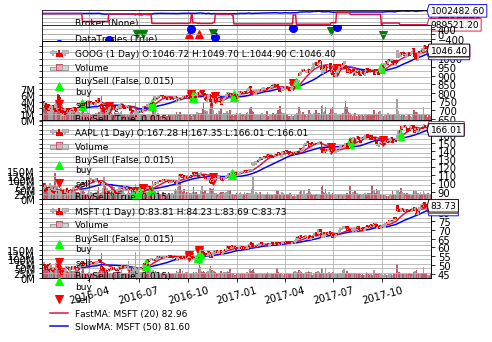

P/L: $2482.5999999999767


In [24]:
strat = run()
strat.runstrat()

In [25]:
strat.financesectortest()

---------------------------- TRADE ---------------------------------
1: Data Name:                            BLK
2: Bar Num:                              68
3: Current date:                         2018-04-10
4: Status:                               Trade Complete
5: Ref:                                  3368
6: PnL:                                  -86.0
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            AJG
2: Bar Num:                              95
3: Current date:                         2018-05-17
4: Status:                               Trade Complete
5: Ref:                                  3380
6: PnL:                                  -23.9
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            ALL
2: Bar Num:                   

---------------------------- TRADE ---------------------------------
1: Data Name:                            COF
2: Bar Num:                              137
3: Current date:                         2018-07-18
4: Status:                               Trade Complete
5: Ref:                                  3410
6: PnL:                                  12.1
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            USB
2: Bar Num:                              137
3: Current date:                         2018-07-18
4: Status:                               Trade Complete
5: Ref:                                  3407
6: PnL:                                  7.8
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            AMP
2: Bar Num:                    

---------------------------- TRADE ---------------------------------
1: Data Name:                            MCO
2: Bar Num:                              195
3: Current date:                         2018-10-09
4: Status:                               Trade Complete
5: Ref:                                  3475
6: PnL:                                  -165.8
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            SPGI
2: Bar Num:                              197
3: Current date:                         2018-10-11
4: Status:                               Trade Complete
5: Ref:                                  3473
6: PnL:                                  -314.1
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            MMC
2: Bar Num:              

---------------------------- TRADE ---------------------------------
1: Data Name:                            AON
2: Bar Num:                              216
3: Current date:                         2018-11-07
4: Status:                               Trade Complete
5: Ref:                                  3423
6: PnL:                                  136.2
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            PGR
2: Bar Num:                              224
3: Current date:                         2018-11-19
4: Status:                               Trade Complete
5: Ref:                                  3487
6: PnL:                                  -63.9
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            FITB
2: Bar Num:                

---------------------------- TRADE ---------------------------------
1: Data Name:                            ICE
2: Bar Num:                              301
3: Current date:                         2019-03-14
4: Status:                               Trade Complete
5: Ref:                                  3574
6: PnL:                                  -24.5
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            SCHW
2: Bar Num:                              304
3: Current date:                         2019-03-19
4: Status:                               Trade Complete
5: Ref:                                  3519
6: PnL:                                  -16.9
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            STT
2: Bar Num:                

---------------------------- TRADE ---------------------------------
1: Data Name:                            AJG
2: Bar Num:                              321
3: Current date:                         2019-04-11
4: Status:                               Trade Complete
5: Ref:                                  3569
6: PnL:                                  11.3
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            WFC
2: Bar Num:                              321
3: Current date:                         2019-04-11
4: Status:                               Trade Complete
5: Ref:                                  3565
6: PnL:                                  -13.0
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            LNC
2: Bar Num:                  

In [26]:
strat.healthsectortest()

---------------------------- TRADE ---------------------------------
1: Data Name:                            INCY
2: Bar Num:                              64
3: Current date:                         2018-04-04
4: Status:                               Trade Complete
5: Ref:                                  3600
6: PnL:                                  -19.7
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            WAT
2: Bar Num:                              66
3: Current date:                         2018-04-06
4: Status:                               Trade Complete
5: Ref:                                  3601
6: PnL:                                  -22.3
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            VAR
2: Bar Num:                  

---------------------------- TRADE ---------------------------------
1: Data Name:                            ZTS
2: Bar Num:                              146
3: Current date:                         2018-07-31
4: Status:                               Trade Complete
5: Ref:                                  3664
6: PnL:                                  -8.0
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            INCY
2: Bar Num:                              149
3: Current date:                         2018-08-03
4: Status:                               Trade Complete
5: Ref:                                  3661
6: PnL:                                  -52.5
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            SYK
2: Bar Num:                 

---------------------------- TRADE ---------------------------------
1: Data Name:                            BDX
2: Bar Num:                              202
3: Current date:                         2018-10-18
4: Status:                               Trade Complete
5: Ref:                                  3640
6: PnL:                                  141.7
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            BAX
2: Bar Num:                              204
3: Current date:                         2018-10-22
4: Status:                               Trade Complete
5: Ref:                                  3676
6: PnL:                                  -67.2
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            BMY
2: Bar Num:                 

---------------------------- TRADE ---------------------------------
1: Data Name:                            ABT
2: Bar Num:                              221
3: Current date:                         2018-11-14
4: Status:                               Trade Complete
5: Ref:                                  3689
6: PnL:                                  -27.6
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            HOLX
2: Bar Num:                              221
3: Current date:                         2018-11-14
4: Status:                               Trade Complete
5: Ref:                                  3690
6: PnL:                                  -4.1
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            PFE
2: Bar Num:                 

---------------------------- TRADE ---------------------------------
1: Data Name:                            TMO
2: Bar Num:                              250
3: Current date:                         2018-12-28
4: Status:                               Trade Complete
5: Ref:                                  3702
6: PnL:                                  -198.4
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            UNH
2: Bar Num:                              250
3: Current date:                         2018-12-28
4: Status:                               Trade Complete
5: Ref:                                  3699
6: PnL:                                  -179.5
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            UHS
2: Bar Num:               

---------------------------- TRADE ---------------------------------
1: Data Name:                            BMY
2: Bar Num:                              313
3: Current date:                         2019-04-01
4: Status:                               Trade Complete
5: Ref:                                  3768
6: PnL:                                  -32.7
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            PFE
2: Bar Num:                              313
3: Current date:                         2019-04-01
4: Status:                               Trade Complete
5: Ref:                                  3773
6: PnL:                                  -4.0
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            ANTM
2: Bar Num:                 

P/L: $-640.3999999992084


In [27]:
strat.itsectortest()

---------------------------- TRADE ---------------------------------
1: Data Name:                            GOOGL
2: Bar Num:                              56
3: Current date:                         2018-03-22
4: Status:                               Trade Complete
5: Ref:                                  3788
6: PnL:                                  -377.5
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            TXN
2: Bar Num:                              61
3: Current date:                         2018-03-29
4: Status:                               Trade Complete
5: Ref:                                  3794
6: PnL:                                  -35.9
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            SYMC
2: Bar Num:               

---------------------------- TRADE ---------------------------------
1: Data Name:                            STX
2: Bar Num:                              148
3: Current date:                         2018-08-02
4: Status:                               Trade Complete
5: Ref:                                  3851
6: PnL:                                  -28.5
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            SYMC
2: Bar Num:                              150
3: Current date:                         2018-08-06
4: Status:                               Trade Complete
5: Ref:                                  3863
6: PnL:                                  -14.7
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            EA
2: Bar Num:                 

---------------------------- TRADE ---------------------------------
1: Data Name:                            ADS
2: Bar Num:                              199
3: Current date:                         2018-10-15
4: Status:                               Trade Complete
5: Ref:                                  3881
6: PnL:                                  -273.8
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            ANSS
2: Bar Num:                              199
3: Current date:                         2018-10-15
4: Status:                               Trade Complete
5: Ref:                                  3884
6: PnL:                                  -272.4
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            FFIV
2: Bar Num:             

---------------------------- TRADE ---------------------------------
1: Data Name:                            JNPR
2: Bar Num:                              228
3: Current date:                         2018-11-26
4: Status:                               Trade Complete
5: Ref:                                  3896
6: PnL:                                  -27.9
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            XRX
2: Bar Num:                              236
3: Current date:                         2018-12-07
4: Status:                               Trade Complete
5: Ref:                                  3895
6: PnL:                                  -23.9
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            ACN
2: Bar Num:                

---------------------------- TRADE ---------------------------------
1: Data Name:                            QCOM
2: Bar Num:                              269
3: Current date:                         2019-01-28
4: Status:                               Trade Complete
5: Ref:                                  3930
6: PnL:                                  -25.7
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            JNPR
2: Bar Num:                              277
3: Current date:                         2019-02-07
4: Status:                               Trade Complete
5: Ref:                                  3952
6: PnL:                                  -23.2
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            TTWO
2: Bar Num:              

In [28]:
strat.energysectortest()

---------------------------- TRADE ---------------------------------
1: Data Name:                            RRC
2: Bar Num:                              79
3: Current date:                         2018-04-25
4: Status:                               Trade Complete
5: Ref:                                  4005
6: PnL:                                  -15.6
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            CXO
2: Bar Num:                              105
3: Current date:                         2018-06-01
4: Status:                               Trade Complete
5: Ref:                                  4026
6: PnL:                                  -186.4
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            XEC
2: Bar Num:                 

---------------------------- TRADE ---------------------------------
1: Data Name:                            HAL
2: Bar Num:                              208
3: Current date:                         2018-10-26
4: Status:                               Trade Complete
5: Ref:                                  4057
6: PnL:                                  -78.3
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            OKE
2: Bar Num:                              208
3: Current date:                         2018-10-26
4: Status:                               Trade Complete
5: Ref:                                  4056
6: PnL:                                  -39.3
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            FTI
2: Bar Num:                 

---------------------------- TRADE ---------------------------------
1: Data Name:                            EQT
2: Bar Num:                              283
3: Current date:                         2019-02-15
4: Status:                               Trade Complete
5: Ref:                                  4063
6: PnL:                                  -15.6
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            CXO
2: Bar Num:                              295
3: Current date:                         2019-03-06
4: Status:                               Trade Complete
5: Ref:                                  4079
6: PnL:                                  -125.4
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            EOG
2: Bar Num:                

In [29]:
strat.resectortest()

---------------------------- TRADE ---------------------------------
1: Data Name:                            SBAC
2: Bar Num:                              54
3: Current date:                         2018-03-20
4: Status:                               Trade Complete
5: Ref:                                  4101
6: PnL:                                  -6.3
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            ARE
2: Bar Num:                              77
3: Current date:                         2018-04-23
4: Status:                               Trade Complete
5: Ref:                                  4102
6: PnL:                                  -48.9
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            ARE
2: Bar Num:                   

2: Bar Num:                              195
3: Current date:                         2018-10-09
4: Status:                               Trade Complete
5: Ref:                                  4105
6: PnL:                                  45.6
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            HST
2: Bar Num:                              196
3: Current date:                         2018-10-10
4: Status:                               Trade Complete
5: Ref:                                  4152
6: PnL:                                  -9.5
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            REG
2: Bar Num:                              196
3: Current date:                         2018-10-10
4: Status:                               Trade 

---------------------------- TRADE ---------------------------------
1: Data Name:                            IRM
2: Bar Num:                              301
3: Current date:                         2019-03-14
4: Status:                               Trade Complete
5: Ref:                                  4181
6: PnL:                                  18.3
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            SPG
2: Bar Num:                              308
3: Current date:                         2019-03-25
4: Status:                               Trade Complete
5: Ref:                                  4211
6: PnL:                                  -46.4
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            VTR
2: Bar Num:                  